<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Practical MCQ: NLP and classification
© ExploreAI Academy

In this train, we'll explore and evaluate different machine learning classifiers through various tasks like model fitting, parameter tuning, and performance comparison.

## Learning objectives

By the end of this notebook, you should be able to:

- Utilise vectorisation techniques to process textual data.
- Implement logistic regression and measure its accuracy.
- Determine optimal model parameters using grid search.
- Interpret the output of machine learning models using confusion matrices.
- Analyse the performance of classifiers with precision-recall metrics.

> ⚠️ Please note that the multiple choices to all questions are not included in this notebook; they are available exclusively on the MCQ webpage.

## Question 1

What does the `CountVectorizer` output `X` represent in the code snippet below?

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
data = ["Machine learning is fascinating.", "Natural language processing and machine learning are closely linked."]

# Initialise the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(data)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

## Question 2

Modify the code below to compute and print the accuracy.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialise the Logistic Regression model
logreg = LogisticRegression(solver='liblinear')

# Train the model
logreg.fit(X_train, y_train)

# Predict the test set results
y_pred = logreg.predict(X_test)

In [3]:
# insert code here
# Calculate the accuracy score of the Model
print(f"The accuracy of the Logistic Regression Model is: {accuracy_score(y_test, y_pred)}")

The accuracy of the Logistic Regression Model is: 0.958041958041958


What is the accuracy of the logistic regression model on the test data?

## Question 3

What is the value of True Positive (TP) in the confusion matrix generated by the RandomForestClassifier below? Modify the code to print the value.


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = rf_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
# insert code here
# Display the confusion matrix 
print(f"The Confusion Matrix is:\n\n {cm}")

# Access the TP, FP, TN, FN in the confusion matrix
TN = cm[0,0]
FP = cm[0, 1]
FN = cm[1, 0]
TP  = cm[1,1]

# Display the output
print(f"\nTrue Negative value: {TN}")
print(f"False Positive value: {FP}")
print(f"False Negative value: {FN}")
print(f"True Positive value: {TP}")

The Confusion Matrix is:

 [[107   8]
 [ 22 113]]

True Negative value: 107
False Positive value: 8
False Negative value: 22
True Positive value: 113


## Question 4

What is the best value of the parameter 'C' for the SVC according to the grid search? Modify the code to print the best parameter.

In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Load a dataset
digits = load_digits()
X = digits.data
y = digits.target

# Initialize an SVC (Support Vector Classifier) with a linear kernel
svm = SVC(kernel='linear')

# Define parameter range for C (regularization parameter)
param_grid = {'C': np.logspace(-3, 3, 7)}

# Setup the grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy')

In [31]:
# insert code here
# Print the best value of the parameter C
grid_search.best_params_

{'C': 0.001}

## Question 5 

Which code snippet can be used to fill in the missing lines of code to train the SVM classifier, predict the test set results, and print the classification report?

In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the SVM classifier with a radial basis function kernel
svm_rbf = SVC(kernel='rbf')

# Fit the classifier to the training data
# [Your Code Here] - Line to add for fitting the model
svm_rbf.fit(X_train, y_train)

# Predict the test set results
# [Your Code Here] - Line to add for making predictions
svm_pred = svm_rbf.predict(X_test)

# Generate and print the classification report
# [Your Code Here] - Line to add for printing the classification report
print(f"The Classifiaction reporrt is as follows:\n\n {classification_report(y_test, svm_pred)}")

The Classifiaction reporrt is as follows:

               precision    recall  f1-score   support

           0       0.80      0.88      0.84       115
           1       0.89      0.81      0.85       135

    accuracy                           0.84       250
   macro avg       0.84      0.85      0.84       250
weighted avg       0.85      0.84      0.84       250



## Question 6

Given the code below, your task is to select the function from the options provided that correctly completes the task by:

i) Creating a function that determines which classifier (KNN or Naive Bayes) has a higher F1 score, or if they have equal scores.

ii) Printing the name of the classifier along with its F1 score in the format: 'ClassifierName has the higher F1 score of Score' or 'Both classifiers have the same F1 score of Score'.

iii) Executing the function.

Select the appropriate code snippet from the options below.

In [38]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize KNN and Naive Bayes classifiers
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Train both classifiers on the training data
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Predict test set results for both classifiers
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Calculate F1 scores for both classifiers
f1_knn = f1_score(y_test, y_pred_knn)
f1_nb = f1_score(y_test, y_pred_nb)

# [Your Code Here]
def best_classifier(f1_knn, f1_nb):
    if f1_knn > f1_nb:
        print(f'KNN has higher F1 score {f1_knn:.4f}')
    elif f1_nb > f1_knn:
        print(f"Naive Bayes has a higher F1 score {f1_nb:.4f}")
    else:
        print(f"Both Classifeir have the same F1 score {f1_knn:.4f}")
        
# Invoking the function
best_classifier(f1_knn, f1_nb)

KNN has higher F1 score 0.8065


## Question  7 

Which of the following options will complete the missing code lines to:

i) train the MLPClassifier, 

ii) predict the test set labels,

iii) count the number of misclassified samples,

iv) call the function to print the results.

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate a two-moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise the MLPClassifier with one hidden layer with 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# [Your Code Here] - Train the MLPClassifier on the scaled training data
mlp.fit(X_train_scaled, y_train)

# [Your Code Here] - Predict the labels for the scaled test data
mlp_pred  = mlp.predict(X_test_scaled)

# [Your Code Here] - Print the number of misclassified samples in the test set
# Count the number of misclassified samples
misclassified_samples = np.sum(mlp_pred != y_test)
print(f"The number of misclassified samples are: {misclassified_samples}")

The number of misclassified samples are: 7


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Question 8

Before running the final line of the code in the snippet below to fit the `grid_search` object, you are asked to perform the following tasks directly in the code:

1. Modify the `param_grid` to include a new parameter: `'max_features'` with values ranging from 1 to 4.
2. Fit the `grid_search` to the training data.
3. After fitting, extract and print the best parameter combination and the corresponding cross-validation score.

Which of the following options correctly completes these tasks?

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Setup a basic decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define a parameter grid over which to optimize the decision tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'max_features': [1, 2, 3, 4]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5)

# fit tghe grid_search to the training data
best_params = grid_search.fit(X_train, y_train)
best_score = grid_search.best_score_


# Print the best parameter
print(f'Best parameter combination:\n\n{best_params}')
print(f'\nBest cross-validation F1 score: {best_score:.4f}')

Best parameter combination:

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [2, 10, 20]})

Best cross-validation F1 score: 0.9372


## Question 9

You are fine-tuning a decision tree classifier for a marketing dataset. To prevent overfitting and ensure robust generalisability, you must adjust the depth of the decision tree after its initialisation but before it is fitted with data. Considering the decision tree `dt` has already been initialised with a random state, which of the following is the correct way to modify the tree's maximum depth?

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialise decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# [Your Code Here
# Adjust the max_depth of the tree to prevent over fitting
dt.max_depth = 5

# Fit the tree to the training data 
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Question 10

Suppose you are analysing the performance of a new email spam detection system using precision and recall. You have already computed these metrics, and you are about to explore their trade-offs to optimise the classifier's threshold. Given the code snippet below, identify the correct function call that would allow you to adjust and visualise the precision-recall trade-off.

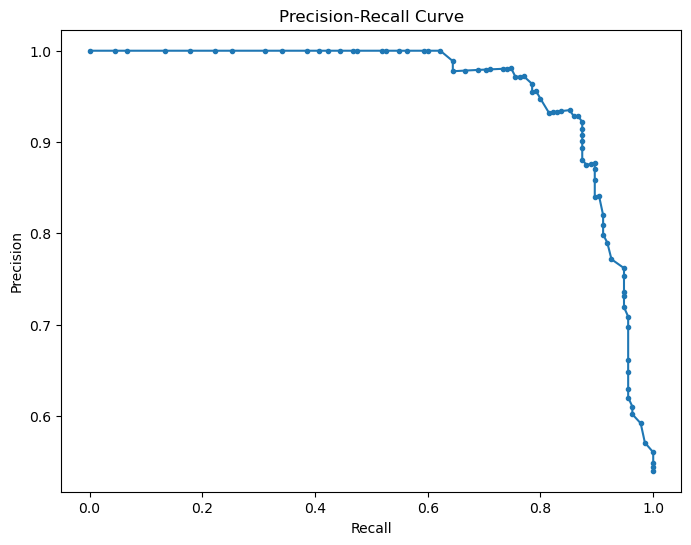

In [55]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a RandomForest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_scores = classifier.predict_proba(X_test)[:, 1]

# [Your Code Here] - Generate precision and recall values for various thresholds
# Compute the presision recall-curve
precision, recall, threshold = precision_recall_curve(y_test, y_scores)


# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



## Question 11

You are tasked with enhancing the robustness of a logistic regression model by incorporating feature scaling. You're currently working with a dataset that has significantly varying scales among its features, which can affect the model's performance. Below is a preliminary setup for the logistic regression model. Identify the correct sequence of steps to integrate feature scaling into the modelling process.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Logistic Regression model
lr = LogisticRegression()

# [Your Code Here] - Apply feature scaling to the training data
# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # [Your Code Here] - Apply the same scaling to the test data

# [Your Code Here] - Fit the model on the scaled training data
lr.fit(X_train_scaled, y_train)


LogisticRegression()

# Question 12

You are fine-tuning a support vector machine (SVM) classifier to categorise images based on their content. The dataset consists of various animal images, and you suspect that different kernel functions might yield better classification accuracy. You decide to test which SVM kernel—linear or radial basis function (RBF)—works best for your specific dataset. Below is your initial code setup:

In [64]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a dataset of digit images
digits = load_digits()
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize two SVM classifiers, one with a linear kernel and another with an RBF kernel
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# [Your Code Here] - Train both classifiers on the training data
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# [Your Code Here] - Predict the test set results with both classifiers
svm_linear_pred = svm_linear.predict(X_test)
svm_rbf_pred = svm_rbf.predict(X_test)

# [Your Code Here] - Calculate and print the accuracy scores for both classifiers
print(f"The accuracy score of the SVM with the linear kernel is: {accuracy_score(y_test, svm_linear_pred)}")
print(f"The accuracy score of the SVM with the RBF kernel is: {accuracy_score(y_test, svm_rbf_pred)}")

The accuracy score of the SVM with the linear kernel is: 0.9822222222222222
The accuracy score of the SVM with the RBF kernel is: 0.9866666666666667


Which of the following options correctly completes the task of training both SVM classifiers, predicting the test set results, and calculating the accuracy for each

## Question 13 

You are currently evaluating two classifiers, K-Nearest Neighbours (KNN) and Naive Bayes, for a project that involves classifying texts into different categories based on their content. To finalise your model selection, you decide to visually compare their performance using a bar chart. Below is the setup for calculating the accuracy of both models on your dataset. Complete the code by adding the necessary lines to plot the accuracies in a bar chart:

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
data = fetch_20newsgroups(subset='all')
X = data.data
y = data.target

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorise text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialise classifiers
knn = KNeighborsClassifier()
nb = MultinomialNB()

# Train classifiers
knn.fit(X_train_tfidf, y_train)
nb.fit(X_train_tfidf, y_train)

# Predict and calculate accuracy
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_tfidf))
nb_accuracy = accuracy_score(y_test, nb.predict(X_test_tfidf))

# [Your code here] - Plot the accuracies in a bar chart
# Plot the accuracies in a bar chart
classifiers = ['K-Nearest Neighbors', 'Naive Bayes']
accuracies = [knn_accuracy, nb_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of KNN and Naive Bayes')
plt.ylim(0, 1)  # Set y-axis limit to ensure accuracy values are within the plot range
plt.show()


Which snippet of code will correctly plot the accuracies of KNN and Naive Bayes classifiers in a bar chart?

## Question 14

You are tasked with evaluating a simple binary classification model using a confusion matrix. The dataset involves predicting whether a given email is spam or not. To better understand the model's performance, you plan to extract specific metrics from the confusion matrix, specifically True Positives (TP) and False Positives (FP). Below is your initial code setup:

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# [Your code here] - Extract and print True Positives and False Positives
TP = cm[1][1]
FP = cm[0,1]

print(f"The True Positive is: {TP}")
print(f"The False Positive is: {FP}")

The True Positive is: 113
The False Positive is: 8


Which snippet of code correctly extracts and prints the True Positives (TP) and False Positives (FP) from the confusion matrix?

Which snippet of code correctly completes the setup to create a pipeline including `PolynomialFeatures` and `LogisticRegression`, fits it on the training data, and makes predictions?

## Question 15 (Medium)

You are refining a logistic regression model to predict customer churn. The dataset includes various customer interaction metrics. To enhance your model, explore how polynomial features can improve prediction accuracy. This approach allows the model to capture complex interactions between variables. 

Here is your setup: 


In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=3, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply polynomial features manually
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

What is the correct procedure to fit a logistic regression model on the training data after transforming it with polynomial features, and how should predictions be made on the test data?

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>